## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

Data description

I created a small extract from GSS with selected variables that capture demographics and household structure, socioeconomic position, attitudes about national spending, and social well-being. The extract includes year, respondent ID (id_), number of children (childs), age (age), education (educ), household size (hompop), total family income (income), attitudes about spending on the space program (natspac) and military/defense (natarms), and friendship satisfaction (satfrnd). These variables support a clear EDA question: how personal and household characteristics relate to views about government spending and to reported friendship satisfaction.

The GSS does not ask every question in every year, so some variables are unavailable for some respondents. In the raw extract, unavailable responses appear as text such as “.i: Inapplicable.” For analysis, those were treated as missing values. After cleaning, I used two analysis subsets: an “attitudes” dataset focusing on space and defense spending views (covering years 1973–2024 in this extract) and a “friendships” dataset focusing on friendship satisfaction (covering years 1973–1994 in this extract).

Cleaning and prep for EDA

I cleaned the dataset in three main steps. First, I converted the special missing-value strings (values beginning with a dot, such as “.i: Inapplicable”) into NaN so missingness is handled consistently in pandas. Second, I converted childs, age, and hompop to numeric types because they represent counts or years. Third, for interpretability in plots, I treated several variables as ordered categories: the spending attitude variables were ordered as TOO LITTLE < ABOUT RIGHT < TOO MUCH, and friendship satisfaction was ordered from NONE up to VERY GREAT DEAL. Finally, I created clean subsets for analysis by dropping rows that were missing values for the variables needed in each section of the EDA.

Numeric summaries and visualizations

The attitudes dataset includes tens of thousands of observations and supports both descriptive summaries and time trends. Basic descriptive statistics show respondents have a wide age range (minimum 18, maximum 88), with an average age in the mid-40s. Household structure variables also vary substantially: the average number of children is around 1–2 and household size is typically around 2–3 people, with a right tail extending to much larger households.

For spending attitudes, bar charts show that “ABOUT RIGHT” is the most common response for both space spending (natspac) and defense spending (natarms). For space, “TOO LITTLE” is the least common category, while “ABOUT RIGHT” and “TOO MUCH” make up most responses. For defense, “ABOUT RIGHT” remains the most common, but “TOO LITTLE” appears more frequently than it does for space.

To examine how attitudes differ across groups, I used a stacked bar chart of row proportions for natspac by education (educ). The distribution of responses differs across education categories, showing that opinions about whether space spending is too high, too low, or about right vary by education level.

To examine change over time, I plotted the share of respondents answering “TOO LITTLE” each year for space and defense. For space spending, the share saying “TOO LITTLE” rises notably in the 2010s and stays higher than in many earlier years. For defense spending, the share saying “TOO LITTLE” spikes sharply around 1980, declines afterward, and rises again in the early 2000s and mid-2010s, indicating that views on defense spending shift over time rather than staying constant.

For friendship satisfaction (satfrnd), the distribution is concentrated at the high end during the years available in this extract (1973–1994). The most common responses are “GREAT DEAL” and “VERY GREAT DEAL,” while the lowest categories are rare. To explore household structure differences, I summarized friendship satisfaction by household size by converting the ordered categories into an ordinal score and plotting the mean score within each household-size group.

Findings

Overall attitudes toward spending are most commonly described as “ABOUT RIGHT,” both for the space program and for defense spending. However, the distribution differs between the two topics: respondents are more likely to say defense spending is “TOO LITTLE” than they are to say that about space spending. This suggests that underfunding concerns are stronger for defense than for space in this sample.

Attitudes toward space spending also vary by education level. When comparing the proportions of “TOO LITTLE,” “ABOUT RIGHT,” and “TOO MUCH” across education categories, the response mix differs meaningfully from one education group to another. Education is therefore correlated with how respondents evaluate space spending.

Public opinion changes over time. The share of respondents saying space spending is “TOO LITTLE” increases in the 2010s and remains elevated relative to many earlier years. Defense spending attitudes show a different pattern, including a pronounced spike in the share saying “TOO LITTLE” around 1980 and later increases in the 2000s and 2010s. These results indicate that attitudes about national spending priorities are historically variable rather than stable across decades.

Friendship satisfaction in this extract is generally high during the years where it is observed. Most respondents report strong satisfaction with friendships (“GREAT DEAL” or “VERY GREAT DEAL”), and relatively few report very low satisfaction. When comparing average friendship satisfaction scores across household sizes, the relationship is not strongly monotonic: common household sizes show similar mean satisfaction, while the averages for very large households fluctuate. This is consistent with the sample sizes by household size: categories above 6 people become rare (for example, 7-person households have 301 cases, 8-person households have 120, 9-person households have 41, and sizes 10–13 have 21 or fewer cases). Because these large-household groups have small sample sizes, their mean satisfaction estimates are more sensitive to random variation and should be interpreted cautiously.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file = "../data/GSS.xlsx"
df = pd.read_excel(file, sheet_name="Data")
df.head()

,year,id_,childs,age,educ,hompop,income,natspac,natarms,satfrnd
0,1972,1,0,23,4 years of college,1,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
1,1972,2,5,70,10th grade,2,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
2,1972,3,4,48,12th grade,4,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
3,1972,4,0,27,5 years of college,2,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
4,1972,5,2,61,12th grade,2,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable


In [29]:
df_eda = df.copy()

# convert ".i: Inapplicable" etc. to NaN
df_eda = df_eda.replace(r"^\..*", np.nan, regex=True)

# numeric columns that may have loaded as text
for c in ["childs", "age", "hompop"]:
    df_eda[c] = pd.to_numeric(df_eda[c], errors="coerce")

In [30]:
spend_order = ["TOO LITTLE", "ABOUT RIGHT", "TOO MUCH"]
for c in ["natspac", "natarms"]:
    df_eda[c] = pd.Categorical(df_eda[c], categories=spend_order, ordered=True)

satfrnd_order = ["NONE", "A LITTLE", "SOME", "A FAIR AMOUNT", "QUITE A BIT", "GREAT DEAL", "VERY GREAT DEAL"]
df_eda["satfrnd"] = pd.Categorical(df_eda["satfrnd"], categories=satfrnd_order, ordered=True)

df_att = df_eda.dropna(subset=["natspac", "natarms", "age", "educ", "income"])
df_friend = df_eda.dropna(subset=["satfrnd", "age", "educ", "income", "hompop", "childs"])

In [31]:
df_att[["age", "childs", "hompop"]].describe()

,age,childs,hompop
count,34689.000000,34158.000000,34646.000000
mean,45.422151,1.798612,2.667812
std,16.919011,1.607027,1.511202
min,18.000000,0.000000,1.000000
25%,31.000000,0.000000,2.000000
50%,43.000000,2.000000,2.000000
75%,58.000000,3.000000,4.000000
max,88.000000,7.000000,13.000000


In [32]:
df_att["natspac"].value_counts()

natspac
ABOUT RIGHT    15076
TOO MUCH       14312
TOO LITTLE      5301
Name: count, dtype: int64

In [33]:
df_att["natarms"].value_counts()

natarms
ABOUT RIGHT    14661
TOO MUCH       11371
TOO LITTLE      8657
Name: count, dtype: int64

In [34]:
df_friend["satfrnd"].value_counts()

satfrnd
GREAT DEAL         8562
VERY GREAT DEAL    6455
QUITE A BIT        3275
A FAIR AMOUNT      2034
SOME                621
A LITTLE            416
NONE                134
Name: count, dtype: int64

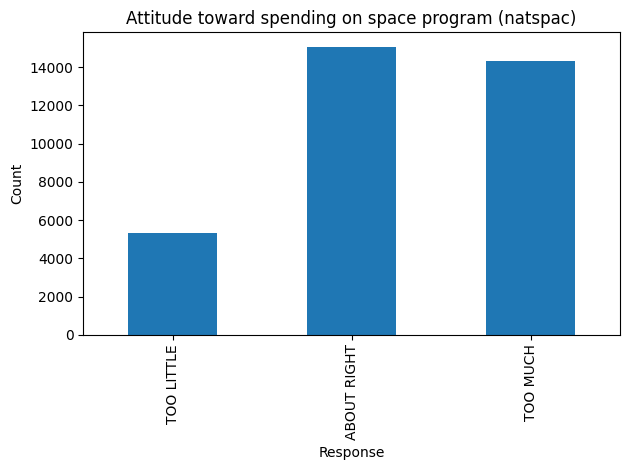

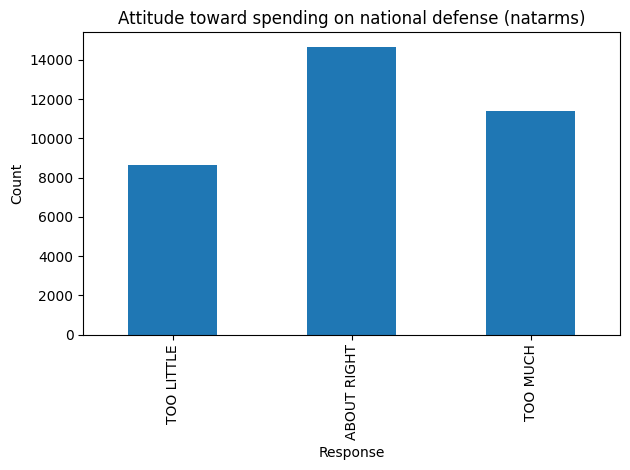

In [35]:
# Plot dist of attitudes (space + defense)
df_att["natspac"].value_counts().reindex(df_att["natspac"].cat.categories).plot(kind="bar")
plt.title("Attitude toward spending on space program (natspac)")
plt.xlabel("Response")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

df_att["natarms"].value_counts().reindex(df_att["natarms"].cat.categories).plot(kind="bar")
plt.title("Attitude toward spending on national defense (natarms)")
plt.xlabel("Response")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [36]:
# Table and plot of natspac by education
tab = pd.crosstab(df_att["educ"], df_att["natspac"], normalize="index")
tab = tab[df_att["natspac"].cat.categories]
tab

natspac,TOO LITTLE,ABOUT RIGHT,TOO MUCH
educ,,,
1 year of college,0.163394,0.447756,0.388850
10th grade,0.094945,0.310792,0.594262
11th grade,0.098448,0.374532,0.527020
12th grade,0.111272,0.424742,0.463986
1st grade,0.043478,0.391304,0.565217
2 years of college,0.190997,0.459308,0.349695
2nd grade,0.053571,0.267857,0.678571
3 years of college,0.225157,0.453459,0.321384
3rd grade,0.021739,0.206522,0.771739


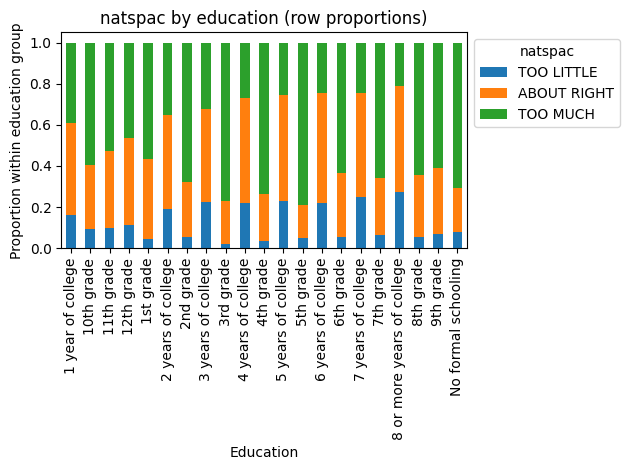

In [37]:
tab.plot(kind="bar", stacked=True)
plt.title("natspac by education (row proportions)")
plt.xlabel("Education")
plt.ylabel("Proportion within education group")
plt.legend(title="natspac", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

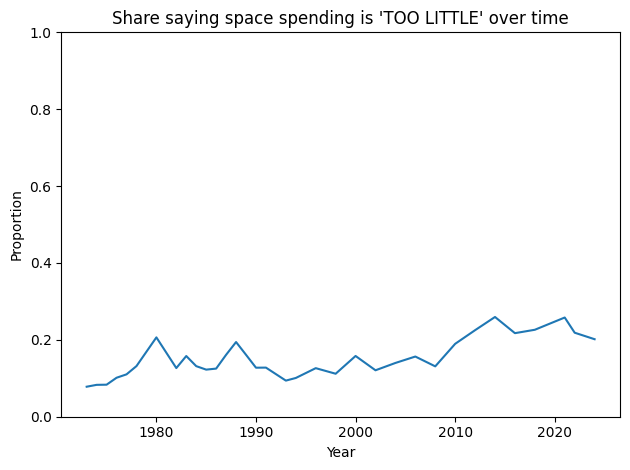

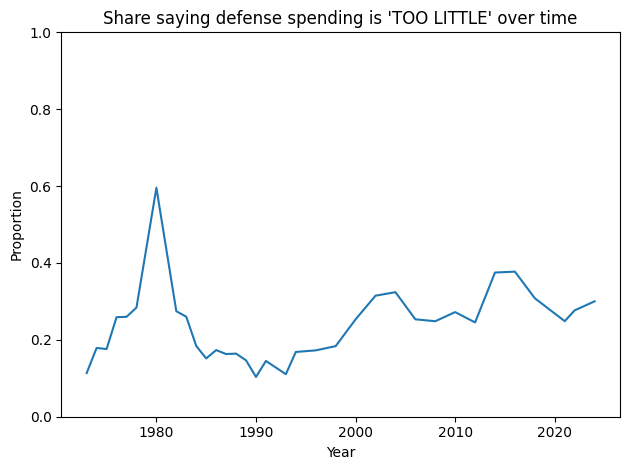

In [38]:
# Tiem trends where they share saying "TOO LITTLE"
trend_space = (df_att["natspac"] == "TOO LITTLE").groupby(df_att["year"]).mean()
trend_space.plot()
plt.title("Share saying space spending is 'TOO LITTLE' over time")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

trend_def = (df_att["natarms"] == "TOO LITTLE").groupby(df_att["year"]).mean()
trend_def.plot()
plt.title("Share saying defense spending is 'TOO LITTLE' over time")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

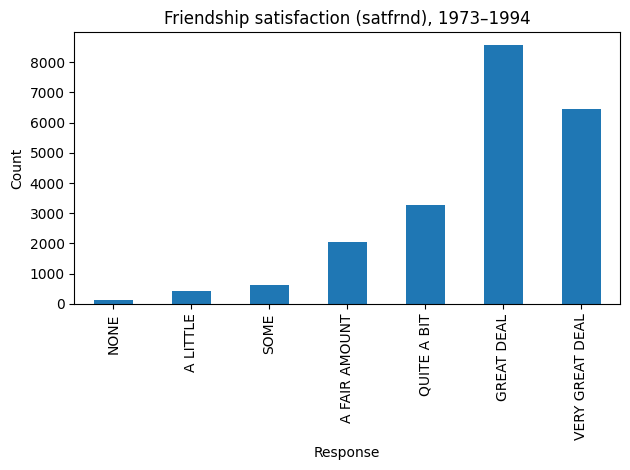

In [39]:
# Friendship satisfaction dist (1973-1994)
df_friend["satfrnd"].value_counts().reindex(df_friend["satfrnd"].cat.categories).plot(kind="bar")
plt.title("Friendship satisfaction (satfrnd), 1973–1994")
plt.xlabel("Response")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

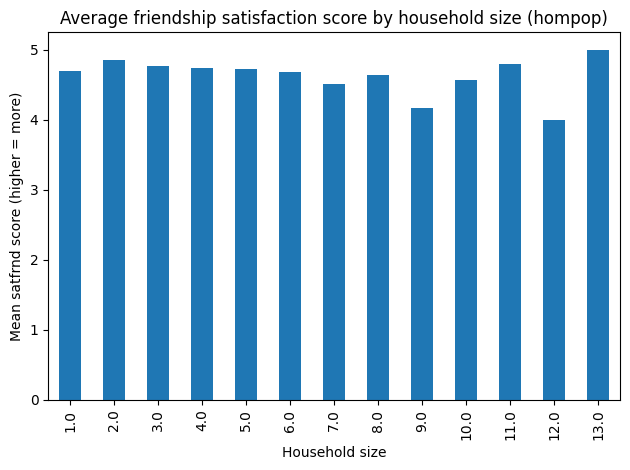

In [40]:
df_friend2 = df_friend.copy()
df_friend2["satfrnd_score"] = df_friend2["satfrnd"].cat.codes  # ordinal score for summary

means_by_hh = df_friend2.groupby("hompop")["satfrnd_score"].mean()
means_by_hh.plot(kind="bar")
plt.title("Average friendship satisfaction score by household size (hompop)")
plt.xlabel("Household size")
plt.ylabel("Mean satfrnd score (higher = more)")
plt.tight_layout()
plt.show()

In [41]:
df_friend["hompop"].value_counts().sort_index()

hompop
1.0     4065
2.0     6714
3.0     3956
4.0     3639
5.0     1887
6.0      745
7.0      301
8.0      120
9.0       41
10.0      21
11.0       5
12.0       1
13.0       2
Name: count, dtype: int64